In [7]:
#Import packages and read dataset
import numpy as np                                                          
import pandas as pd
import matplotlib.pyplot as plt
db = pd.read_csv("C:/Users/KASIM/Downloads/Social_Network_Ads.csv")
print(db.shape)
print(db.head())

(400, 5)
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [8]:
#Categorize attributes for dependent and independent variables
X1 = db['Age'].values
X2 = db['EstimatedSalary'].values
Y = db['Purchased'].values
#Finding slope and intercept values
x1_mean = np.mean(X1)
x2_mean = np.mean(X2)
y_mean = np.mean(Y)
print("Mean of x1:",x1_mean)
print("Mean of x2:",x2_mean)
print("Mean of y:",y_mean)


Mean of x1: 37.655
Mean of x2: 69742.5
Mean of y: 0.3575


In [9]:
#FINDING COEFFICIENTS OF Bo & B1 & B2
n = len(X1)
numer = 0
denom = 0
def ans(a,b):
     lis=[]
     for i in range(0,len(Y)):
          lis.append(a[i]*b[i]);
     return sum(lis);
def result(x,y):
     z=ans(x,y)-((sum(x)*sum(y))/len(y));
     return z

b2numer=((result(X1,X1)*result(X2,Y))-(result(X1,X2)*result(X1,Y)));
b2denom=((result(X1,X1)*result(X2,X2))-(result(X1,X2)*result(X1,X2))); 
b1numer=((result(X2,X2)*result(X1,Y))-(result(X1,X2)*result(X2,Y)));
b1denom=((result(X1,X1)*result(X2,X2))-(result(X1,X2)*result(X1,X2))); 
b1 = b1numer / b1denom
b2 = b2numer / b2denom
bo = y_mean - (b1 * x1_mean) - (b2 * x2_mean)
print("Coefficient for Age, Estimated Salary and Purchased are: ")
print(b2,   b1,   bo)

Coefficient for Age, Estimated Salary and Purchased are: 
3.828130041177301e-06 0.026560504728847828 -0.9096191649615728


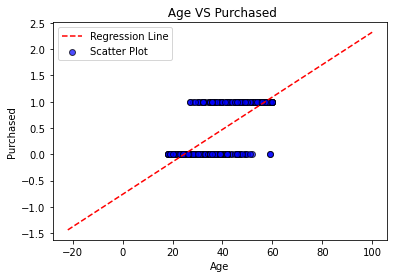

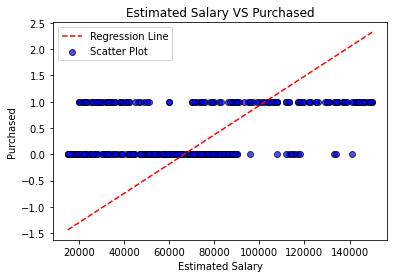

In [10]:
#Fitting the simple linear regression equation
x1_max = np.max(X1) + 40
x1_min = np.min(X1) - 40
x1 = np.linspace(x1_min, x1_max, 1000)
x2_max = np.max(X2) + 40
x2_min = np.min(X2) - 40
x2 = np.linspace(x2_min, x2_max, 1000)
y = bo + b1 * x1 + b2 * x2
#Visualization of the model
plt.plot(x1, y, color = 'red',linestyle = 'dashed',  label='Regression Line')
plt.scatter(X1, Y, color = 'blue', alpha = 0.7, edgecolors = "black", label='Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title(' Age VS Purchased')
plt.legend()
plt.show()
plt.plot(x2, y, color = 'red',linestyle = 'dashed',  label='Regression Line')
plt.scatter(X2, Y, color = 'blue', alpha = 0.7, edgecolors = "black", label='Scatter Plot')
plt.xlabel('Estimated Salary')
plt.ylabel('Purchased')
plt.title('Estimated Salary VS Purchased')
plt.legend()
plt.show()

In [11]:
#Finding Root Mean Square Error (RMSE)
rmse = 0
for i in range(n):
    y_predict = bo + b1 * X1[i] + b2 * X2[i]
    rmse += (Y[i] - y_predict) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)
ss_total = 0
ss_res = 0
#Finding R2 value
for i in range(n):
    y_predict = bo + b1 * X1[i] + b2 * X2[i]
    ss_total += (Y[i] - y_mean) ** 2
    ss_res += (Y[i] - y_predict) ** 2
r2 = 1 - (ss_res/ss_total)
print("R2 Score")
print(r2)
print()

RMSE
0.352297856579926
R2 Score
0.4596553900538888

